In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [44]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
raw_data.shape

(20052, 680)

In [7]:
raw_data.columns.tolist()

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [12]:
raw_data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

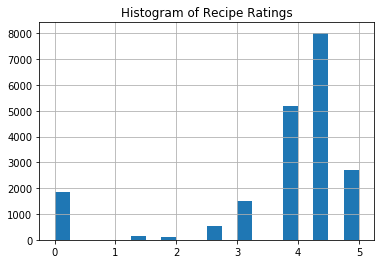

In [18]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [19]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [4]:
from sklearn.svm import SVR
start = time.time()
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
#svr.fit(X,Y)
end = time.time()
print('Time: {0:.5f}s'.format((end-start)))

Time: 0.03811s


In [23]:
svr.score(X,Y)

0.03856570651298896

In [5]:
from sklearn.model_selection import cross_val_score
#cross_val_score(svr, X, Y, cv=5)

# Challenge:
## Transform this regression problem into a *binary classifier* and clean up the feature set
#### Cut feature set down to the 30 most valuable features

In [6]:
# We need to create a binary for our outcome variable
print(pd.cut(np.array(raw_data.rating), 2).categories.format())

print(raw_data.rating.value_counts())

# From the description of the rating data above we can see that the median value is 4.375
# Let's choose to split the ratings for a binary outcome at 4 or better to create 
# a high rating and a low rating - this will split the data ~50%
y = np.where(raw_data.rating >=4, 1, 0)

print(collections.Counter(y))

['(-0.005, 2.5]', '(2.5, 5.0]']
4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64
Counter({1: 10738, 0: 9314})


The data is far to big to work with right now so lets sample down to 50%

In [7]:
# Randomly sample 50% of the data to work with
training_set = raw_data.sample(frac=.5)
print(training_set.shape)

sampled_y = np.where(training_set.rating >=4, 1, 0)

print(collections.Counter(sampled_y))

(10026, 680)
Counter({1: 5414, 0: 4612})


In [8]:
from sklearn.svm import SVC
start = time.time()
svc = SVC()
X = training_set.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = sampled_y
svc.fit(X,Y)
end = time.time()
print('Time: {0:.5f}s'.format((end-start)))

Time: 83.36558s


In [9]:
s=time.time()
print("Accuracy")
print(svc.score(X,Y))
e=time.time()
print('Time: {0:.5f}s'.format((e-s)))

s=time.time()
print('Cross Validation')
print(cross_val_score(svc, X, Y, cv=5))
e=time.time()
print('Time: {0:.5f}s'.format((e-s)))

Accuracy
0.5570516656692599
Time: 81.99406s
Cross Validation
[0.55184447 0.55383848 0.55910224 0.54862843 0.54690619]
Time: 372.14386s


In [10]:
svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

As a binary classifier we have improved the model drastically both in accuracy and overfitting, but the accuracy is still not great.  We need to drop some of the less important features to improve the model.  Unfortunately, since we are using the kernel set to 'RBF' (radial basis function) we cannot use the coefficients to determine the strength of the features. That would have only applied if we used a linear kernel.  In a linear SVC situation a hyperplane is created using the support vectors to maximize the distance between the classes.  **The weights from the coefficients represent the vector coordinates that are orthogonal to the hyperplane and their distances indicate the predicted class.** With this, the magnitude of the coefficients can be used to determine the importance of the features relative to eachother.

To find the top features we can attempt to run this model with the kernel set to linear, find the top features based on the coefficients and then switch the kernel back to 'RBF'.  We can also fit the model to a Random Forest model and use the feature_importance_ method to get our top 30.

Another interesting idea would be some kind of feature engineering where we combine features based on correlation with the outcome variable.

### Setting kernel to linear to find feature importance

In [11]:
start = time.time()
svc_lin = SVC(kernel='linear')
svc_lin.fit(X,Y)
end = time.time()
print('Fit Time: {0:.5f}s'.format((end-start)))

s=time.time()
print("Accuracy")
print(svc_lin.score(X,Y))
e=time.time()
print('Score Time: {0:.5f}s'.format((e-s)))

s=time.time()
print('Cross Validation')
print(cross_val_score(svc_lin, X, Y, cv=5))
e=time.time()
print('Cross Val Time: {0:.5f}s'.format((e-s)))

Fit Time: 137.24122s
Accuracy
0.6543985637342908
Score Time: 70.90869s
Cross Validation
[0.59371884 0.58524427 0.60598504 0.59850374 0.59680639]
Cross Val Time: 369.76144s


By using the linear kernel we have improve the accuracy with a fairly stable cross validation, albeit with a slightly higher error than the RBF kernel.

In [12]:
coef=svc_lin.coef_.ravel()
print(coef.shape)
print('')
#print(np.argsort(coef))
topp = np.argsort(coef)[-10:]
topn = np.argsort(coef)[:10]
print(topp)
print("")
print(np.hstack([topp,topn]))
print('')
print(coef[topp])

(674,)

[ 59 347 368 585 272   2 138 645 289 120]

[ 59 347 368 585 272   2 138 645 289 120 471 177 563 311 336 180 110 224
 200 220]

[1.06972554 1.08989659 1.13612202 1.15699602 1.17012443 1.18161349
 1.18704949 1.20087493 1.28710158 1.35969802]


In [13]:
def plot_coefficients(feature_names, top_features=20):
    '''Function to plot the most important features based on magnitude of coefficient'''
    # Get the coefficients in a 1-D array
    coef = svc_lin.coef_.ravel()
    
    # Grab indices for the top positive and negative features based on magnitude
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    
    # Create a 1-D array for the index of the top coefficients 
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
     # Create plot
    plt.figure(figsize=(15, 5))
    
    # Specify colors for pos and neg coefficients
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    
    # Plot 
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
    # Return list of top features
    top_features=feature_names[top_coefficients].tolist()
    return top_features

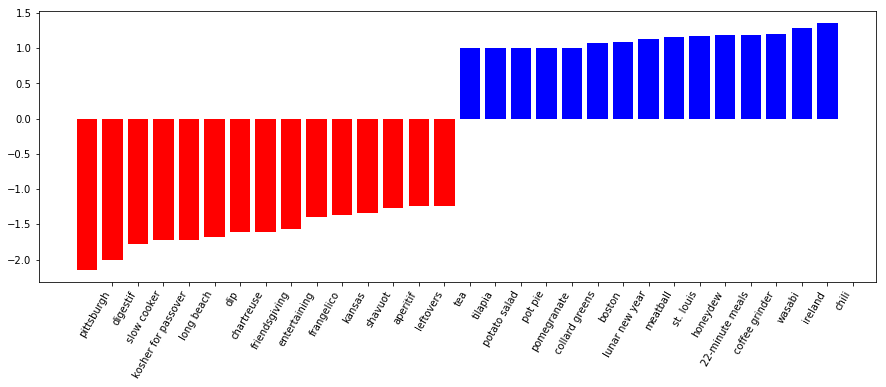

In [24]:
#cv=CountVectorizer()
#cv.fit(training_set)
#print(cv.get_feature_names())
#feat_names = cv.get_feature_names()

################## The code above breaks the feature names up over spaces ##########################
# We could remove the spaces from the feature names or try something else

feat_names = X.columns.tolist()

top_features_svc = plot_coefficients(feat_names, top_features=15)

In [25]:
top_features_svc

['pittsburgh',
 'digestif',
 'slow cooker',
 'kosher for passover',
 'long beach',
 'dip',
 'chartreuse',
 'friendsgiving',
 'entertaining',
 'frangelico',
 'kansas',
 'shavuot',
 'aperitif',
 'leftovers',
 'tea',
 'tilapia',
 'potato salad',
 'pot pie',
 'pomegranate',
 'collard greens',
 'boston',
 'lunar new year',
 'meatball',
 'st. louis',
 'honeydew',
 '22-minute meals',
 'coffee grinder',
 'wasabi',
 'ireland',
 'chili']

In [26]:
# Use random forest to find top features
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Fit model
rf.fit(X, Y)

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-30:]
rf_top_feat = X.iloc[:, indices].columns.tolist()

In [27]:
svclist = pd.Series(top_features_svc).sort_values().reset_index()[0]
rfclist = pd.Series(rf_top_feat).sort_values().reset_index().reset_index()[0]
top_feats_df = pd.concat([svclist, rfclist], axis=1, keys=['SVC', 'RandomForest'])
print(top_feats_df)

print(svclist.equals(rfclist))

                    SVC       RandomForest
0       22-minute meals               bake
1              aperitif        bon appétit
2                boston              chill
3            chartreuse              dairy
4                 chili             dinner
5        coffee grinder                egg
6        collard greens               fall
7              digestif     food processor
8                   dip              fruit
9          entertaining             garlic
10           frangelico             ginger
11        friendsgiving            gourmet
12             honeydew            healthy
13              ireland               herb
14               kansas       kid-friendly
15  kosher for passover              lemon
16            leftovers         milk/cream
17           long beach            no-cook
18       lunar new year              onion
19             meatball       quick & easy
20           pittsburgh              sauté
21          pomegranate               side
22         

In [29]:
# Create new X
X_top_svc = X.loc[:, top_features_svc]

# Start timer
start = time.time()

# Fit model
svc_lin.fit(X_top_svc,Y)
end = time.time()
print('Fit Time: {0:.5f}s'.format((end-start)))

# Get accuracy
s=time.time()
print("Accuracy")
print(svc_lin.score(X_top_svc,Y))
e=time.time()
print('Score Time: {0:.5f}s'.format((end-start)))

# Cross Validation
s=time.time()
print('Cross Validation')
print(cross_val_score(svc_lin, X_top_svc, Y, cv=5))
e=time.time()
print('Cross Val Time: {0:.5f}s'.format((e-s)))

Fit Time: 3.31704s
Accuracy
0.5478755236385398
Score Time: 3.31704s
Cross Validation
[0.54835494 0.54935194 0.54713217 0.54413965 0.54640719]
Cross Val Time: 12.08127s


In [31]:
# Create new X
X_top_rfc = X.loc[:, rf_top_feat]

# Start timer
start = time.time()

# Fit model
svc_lin.fit(X_top_rfc,Y)
end = time.time()
print('Fit Time: {0:.5f}s'.format((end-start)))

# Get accuracy
s=time.time()
print("Accuracy")
print(svc_lin.score(X_top_rfc,Y))
e=time.time()
print('Score Time: {0:.5f}s'.format((end-start)))

# Cross Validation
s=time.time()
print('Cross Validation')
print(cross_val_score(svc_lin, X_top_rfc, Y, cv=5))
e=time.time()
print('Cross Val Time: {0:.5f}s'.format((e-s)))

Fit Time: 4.41859s
Accuracy
0.5552563335328147
Score Time: 4.41859s
Cross Validation
[0.55433699 0.56031904 0.56009975 0.54064838 0.56087824]
Cross Val Time: 16.72300s


Found a solution to this dataset that create 3 new features that represented the total hits for each feature, the total hits from positively correlated features, and the total hits from negatively correlated features.

In [45]:
# Create new binary target variable - greater than 4 is 1
exp_df = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
exp_df['target'] = np.where(raw_data.rating >= 4, 1, 0)

# Create the correlation matrix to find the most positively and negatively correlated features
corr_matrix = exp_df.corr()

# get top 15 positively correlated features
pos_corr = corr_matrix['target'].sort_values(ascending=False).head(15)
pos_corr = pd.DataFrame(pos_corr)
print(pos_corr)

# get top 15 negatively correlated features
neg_corr = corr_matrix['target'].sort_values(ascending=True).head(15)
neg_corr = pd.DataFrame(neg_corr)
print(neg_corr)

                     target
target             1.000000
bon appétit        0.097076
roast              0.068198
thanksgiving       0.067094
peanut free        0.065897
soy free           0.065799
dinner             0.062186
christmas          0.054409
grill/barbecue     0.051204
tree nut free      0.047943
backyard bbq       0.047682
fall               0.046565
grill              0.042924
stuffing/dressing  0.042454
goat cheese        0.041207
                  target
house & garden -0.092801
drink          -0.083065
alcoholic      -0.077158
gin            -0.071066
cocktail party -0.063534
spirit         -0.057028
bitters        -0.052951
low fat        -0.049230
cocktail       -0.045829
pasta          -0.043092
harpercollins  -0.042345
rum            -0.041792
vegan          -0.039458
stir-fry       -0.038336
tofu           -0.034426


In [46]:
# Create positive correlation sum and negative correlation sum variables
exp_df['positive'] = exp_df[pos_corr.columns.tolist()].sum(axis=1)
exp_df['negative'] = exp_df[neg_corr.columns.tolist()].sum(axis=1)

# Create total sum of hits variable
exp_df['total'] = exp_df.sum(axis=1)

print(exp_df.head())

   #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0        0.0         0.0              0.0                   0.0   
1        0.0         0.0              0.0                   0.0   
2        0.0         0.0              0.0                   0.0   
3        0.0         0.0              0.0                   0.0   
4        0.0         0.0              0.0                   0.0   

   30 days of groceries  advance prep required  alabama  alaska  alcoholic  \
0                   0.0                    0.0      0.0     0.0        0.0   
1                   0.0                    0.0      0.0     0.0        0.0   
2                   0.0                    0.0      0.0     0.0        0.0   
3                   0.0                    0.0      0.0     0.0        0.0   
4                   0.0                    0.0      0.0     0.0        0.0   

   almond  ...    zucchini  cookbooks  leftovers  snack  snack week  turkey  \
0     0.0  ...         0.0        0.0        0.0 

In [50]:
from sklearn.svm import SVR
svr = SVR()
# Create X and Y
X1 = exp_df[['positive', 'negative', 'total']]
Y1 = exp_df.target

# fit model
svr.fit(X1, Y1)

# Score
print('Accuracy')
print(svr.score(X1, Y1))
print('')
# Cross validate
print('Cross Validation')
print(cross_val_score(svr, X1, Y1, cv=5))

Accuracy
0.9599227762659861

Cross Validation
[0.95986585 0.95985911 0.95990514 0.9600586  0.95940382]


Interestingly, the Support Vector Classifier gives a perfect answer and validation.  The regression seems to give a more appropriate response.


I believe fitting and scoring the model using the positively and negatively correlated variables worked so well due to the bias in the data.  People are going to give good rating to the recipes they like and vice versa; therefore, creating variables to capture the positive and negative review bias would work really well as a model.

Future challenge: Include the nutrition information that has ~4200 missing values.